In [2]:
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import *
from sklearn.metrics.pairwise import *
import pandas as pd
import warnings
import time
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import *
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.pairwise import euclidean_distances

In [4]:
df_genomica_oc = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\all_ct_genomic_feat_puliti.xlsx", header=0)

In [5]:
df_genomica_hy = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\hy_genomics_feat.xlsx", header=0)

In [6]:
df_genomica_la = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\la_genomics_feat.xlsx", header=0)

In [7]:
df_genomica_op = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\op_genomics_feat.xlsx", header=0)

In [8]:
df_genomica_hy = df_genomica_hy.drop(columns = 'Unnamed: 0.1')
df_genomica_op = df_genomica_op.drop(columns = 'Unnamed: 0.1')
df_genomica_la = df_genomica_la.drop(columns = 'Unnamed: 0.1')
df_genomica_hy = df_genomica_hy.drop(columns=['Unnamed: 0'])
df_genomica_la = df_genomica_la.drop(columns=['Unnamed: 0'])
df_genomica_op = df_genomica_op.drop(columns=['Unnamed: 0'])
df_genomica_op.describe()

,SS_INT_MI_0205,SS_INT_MI_0203,SS_INT_MI_0015,SS_INT_0226,SS_INT_0028,SS_INT_0115,SS_INT_0030,SS_INT_0023,SS_INT_0299,SS_INT_0149,...,SS_VUMC_OP_9573,SS_VUMC_OP_604,SS_VUMC_OP_9555,SS_VUMC_OP_1817,SS_VUMC_OP_6266,SS_INT_0412,SS_INT_MI_0223,SS_VUMC_OP_2720,SS_INT_0279,SS_VUMC_OP_3558
count,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.00000,...,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000
mean,4.950669,5.143657,5.296518,5.073920,5.044114,5.265219,5.320741,5.082952,5.032993,5.48134,...,4.714219,4.816218,4.723218,4.807099,4.681769,4.704631,4.632708,4.811897,4.775495,4.767998
std,1.752039,1.805829,2.178918,1.826697,1.688019,2.122921,2.161750,1.896566,1.696778,2.11904,...,1.362237,1.817396,1.563156,1.734642,1.386143,1.554784,1.516914,1.764775,1.659026,1.397286
min,2.590000,2.680000,2.650000,2.600000,2.660000,2.640000,2.610000,2.540000,2.490000,2.62000,...,2.360000,2.380000,2.400000,2.400000,2.460000,2.430000,2.430000,2.440000,2.390000,2.430000
25%,3.800000,3.930000,3.780000,3.840000,3.900000,3.800000,3.840000,3.820000,3.920000,3.96000,...,3.800000,3.600000,3.680000,3.650000,3.740000,3.670000,3.640000,3.660000,3.680000,3.840000
50%,4.490000,4.660000,4.630000,4.580000,4.620000,4.620000,4.650000,4.550000,4.610000,4.89000,...,4.450000,4.330000,4.360000,4.350000,4.400000,4.330000,4.280000,4.350000,4.360000,4.490000
75%,5.570000,5.830000,6.140000,5.770000,5.720000,6.070000,6.120000,5.760000,5.670000,6.42000,...,5.310000,5.490000,5.350000,5.450000,5.280000,5.310000,5.190000,5.410000,5.390000,5.360000
max,19.790000,19.880000,19.930000,19.850000,19.930000,19.930000,19.900000,19.750000,19.670000,19.93000,...,19.870000,19.930000,19.920000,19.920000,19.920000,19.930000,19.900000,19.890000,19.920000,19.850000


In [26]:
import numpy as np
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Inizializzazione
max_ari = -1
best_n_neighbors = None
neighbours = np.linspace(5, 150, 5, dtype=int)  # n_neighbors deve essere intero

for n in neighbours:
    print(f"\nEsecuzione con n_neighbors={n}...")
    
    # Creazione dell'oggetto UMAP
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_genomica_oc.T)
    op = reducer.fit_transform(df_genomica_op.T)
    hy = reducer.fit_transform(df_genomica_hy.T)
    la = reducer.fit_transform(df_genomica_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    print(combined_embedding)
    # Clustering con KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(combined_embedding)
    
    # Calcolo del Silhouette Score (se ci sono più cluster)
    if len(set(labels)) > 1:
        score = silhouette_score(combined_embedding, labels)
    else:
        score = None
    
    # Calcolo dell'Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(combined_dataset['Type'], labels)
    
    # Aggiornamento del miglior ARI
    if ari > max_ari:
        max_ari = ari
        best_n_neighbors = n
        print(f"Nuovo miglior ARI: {ari:.2f}")
        print(f"Silhouette Score: {score:.2f}" if score is not None else "Silhouette Score non calcolabile.")
        print(f"Neighbours = {n}")
    
    # Visualizzazione dei cluster (opzionale)
    # plt.figure(figsize=(10, 8))
    # unique_labels = set(labels)
    # for label in unique_labels:
    #     mask = labels == label
    #     plt.scatter(
    #         combined_embedding[mask, 0],
    #         combined_embedding[mask, 1],
    #         label=f"Cluster {label}",
    #         alpha=0.6
    #     )
    # plt.title(f"Clustering con KMeans (n_neighbors={n})")
    # plt.xlabel("UMAP Dimension 1")
    # plt.ylabel("UMAP Dimension 2")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

print(f"\nMiglior ARI: {max_ari:.2f} con n_neighbors={best_n_neighbors}")




Esecuzione con n_neighbors=5...


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[[-0.05982053 10.998607  ]
 [ 2.9755108  10.868966  ]
 [ 9.288797    6.585992  ]
 ...
 [-2.113794    2.8268995 ]
 [-1.8901293   2.59001   ]
 [16.657127    3.3863807 ]]
Nuovo miglior ARI: 0.21
Silhouette Score: 0.38
Neighbours = 5

Esecuzione con n_neighbors=41...


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[[11.003063    0.4448325 ]
 [13.109557   -0.5995286 ]
 [17.448105   -5.4641204 ]
 ...
 [-0.19462885  4.890327  ]
 [-0.41786355  5.290473  ]
 [-3.22124     9.5211935 ]]
Nuovo miglior ARI: 0.62
Silhouette Score: 0.60
Neighbours = 41

Esecuzione con n_neighbors=77...


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[[  4.4925604   8.460778 ]
 [  2.3722236   7.862787 ]
 [ -4.2804112   8.917501 ]
 ...
 [ -7.1447854   4.3143153]
 [ -7.580565    4.10582  ]
 [-10.911554    1.2801379]]

Esecuzione con n_neighbors=113...


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[[ 3.033839   13.506857  ]
 [ 0.96097225 14.44808   ]
 [-5.9980025  13.490486  ]
 ...
 [-5.8518996   0.56041116]
 [-6.2061963   0.5124497 ]
 [-8.271902   -2.83548   ]]
Nuovo miglior ARI: 0.71
Silhouette Score: 0.77
Neighbours = 113

Esecuzione con n_neighbors=150...


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


[[-8.273845  14.337821 ]
 [-9.767281  12.379295 ]
 [-8.305676   6.230663 ]
 ...
 [-1.2401809  7.440516 ]
 [-1.0183691  7.733266 ]
 [ 2.2181442 10.174772 ]]

Miglior ARI: 0.71 con n_neighbors=113


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[2 2 2 ... 3 3 3]

Clustering con n_neighbors=113
Cluster 2: ['SS_INT_0519', 'SS_INT_0035', 'SS_PR126', 'SS_305', 'SS_145', 'SS_PR131', 'SS_PR132', 'SS_PR133', 'SS_PR136', 'SS_PR139', 'SS_NPR125', 'SS_PR150', 'SS_PR151', 'SS_PR153', 'SS_PR154', 'SS_PR156', 'SS_PR157', 'SS_PR142', 'SS_PR161', 'SS_PR146', 'SS_PR147', 'SS_PR149', 'SS_INT_MI_0005', 'SS_INT_MI_0026', 'SS_INT_MI_0051', 'SS_INT_MI_0049', 'SS_INT_0351', 'SS_INT_MI_0086', 'SS_INT_MI_0091', 'SS_INT_MI_0087', 'SS_INT_0040', 'SS_INT_0469', 'SS_INT_MI_0243', 'SS_VUMC_013', 'SS_VUMC_137', 'SS_VUMC_034', 'SS_INT_MI_0093', 'SS_VUMC_045', 'SS_253', 'SS_VUMC_047', 'SS_VUMC051', 'SS_VUMC_116', 'SS_VUMC_032', 'SS_VUMC_144', 'SS_VUMC_166', 'SS_251', 'SS_VUMC_OC_2995', 'SS_VUMC_OC_8718', 'SS_INT_MI_0108', 'SS_INT_MI_0112', 'SS_VUMC_OC_6946', 'SS_INT_0535', 'SS_173', 'SS_174', 'SS_175', 'SS_177', 'SS_295', 'SS_91', 'SS_227', 'SS_228', 'SS_231', 'SS_233', 'SS_254', 'SS_257', 'SS_155', 'SS_160', 'SS_158', 'SS_150', 'SS_166', 'SS_172', 'SS_184'

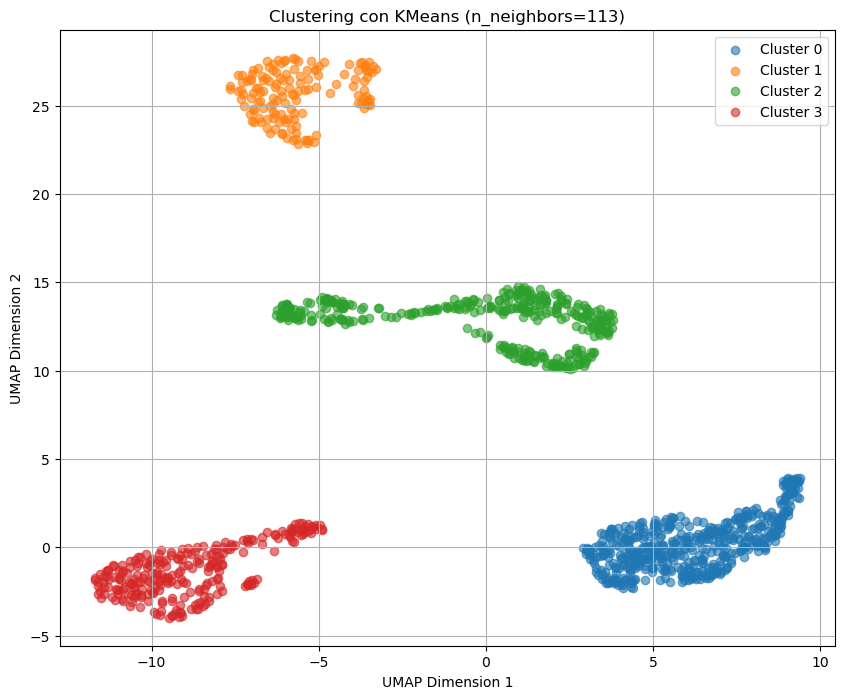


Miglior ARI: 0.71


In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Inizializzazione
max_ari = -1
neighbours = [113]

# Lista con i nomi dei pazienti
patient_names = df_genomica_oc.columns.tolist() + df_genomica_op.columns.tolist() + df_genomica_hy.columns.tolist() + df_genomica_la.columns.tolist()

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_genomica_oc.T)
    op = reducer.fit_transform(df_genomica_op.T)
    hy = reducer.fit_transform(df_genomica_hy.T)
    la = reducer.fit_transform(df_genomica_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(combined_embedding)
    print(labels)
    # Stampa delle etichette di clustering
    cluster_dict = {}
    for idx, label in enumerate(labels):
        if label not in cluster_dict:
            cluster_dict[label] = []
        cluster_dict[label].append(patient_names[idx])
        
    print(f"\nClustering con n_neighbors={n}")
    for cluster_id, patients in cluster_dict.items():
        print(f"Cluster {cluster_id}: {patients}")
    
    # Calcolo delle metriche
    score = silhouette_score(combined_embedding, labels) if len(set(labels)) > 1 else None
    ari = adjusted_rand_score(combined_dataset['Type'], labels)
    
    if ari > max_ari:
        max_ari = ari
        print(f"\nNuovo miglior ARI: {ari:.2f}")
        print(f"Silhouette Score: {score:.2f}" if score is not None else "Silhouette Score non calcolabile.")
        print('Neighbours =', n)
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels)
    for label in unique_labels:
        mask = labels == label
        plt.scatter(
            combined_embedding[mask, 0],
            combined_embedding[mask, 1],
            label=f"Cluster {label}",
            alpha=0.6
        )
    plt.title(f"Clustering con KMeans (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari:.2f}")


In [16]:
doc = df_genomica_oc.T
dla = df_genomica_la.T
dhy = df_genomica_hy.T
dop = df_genomica_op.T


In [18]:
dla['Type'] = 'la'
dhy['Type'] = 'hy'
dop['Type'] = 'op'
doc['Type'] = 'oc'

In [20]:
combined_dataset = pd.concat([dla, dhy, dop, doc], ignore_index=True)

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


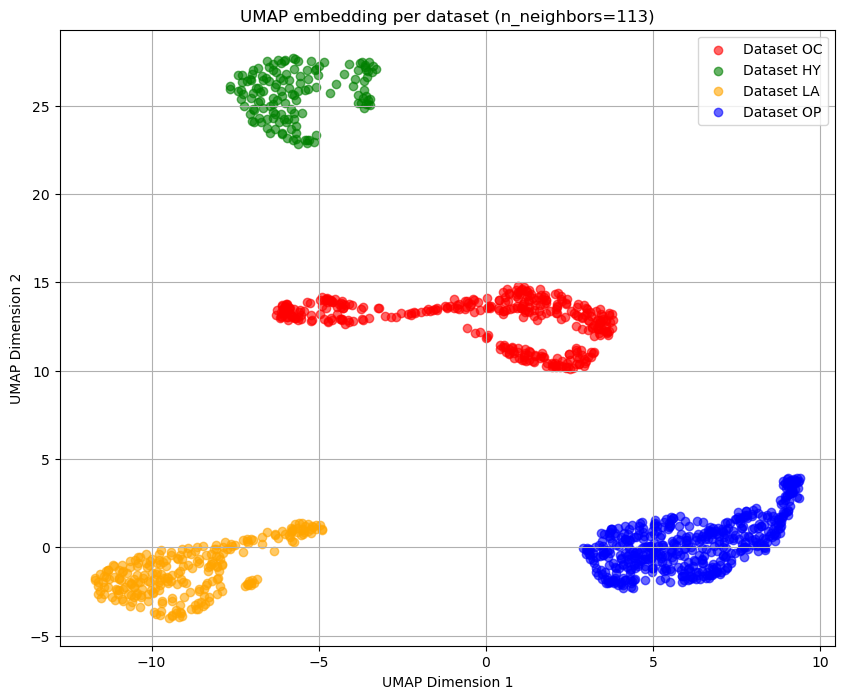


Miglior ARI: -1.00


In [30]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import umap

# Inizializzazione
max_ari = -1
neighbours = [113]

# Array di etichette per identificare il dataset di origine
dataset_labels = (
    ["OC"] * df_genomica_oc.shape[1] +  # Assegna "OC" per ogni colonna di df_oc
    ["OP"] * df_genomica_op.shape[1] +  # Assegna "OP" per ogni colonna di df_op
    ["HY"] * df_genomica_hy.shape[1] +  # Assegna "HY" per ogni colonna di df_hy
    ["LA"] * df_genomica_la.shape[1]    # Assegna "LA" per ogni colonna di df_la
)

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_genomica_oc.T)
    op = reducer.fit_transform(df_genomica_op.T)
    hy = reducer.fit_transform(df_genomica_hy.T)
    la = reducer.fit_transform(df_genomica_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Assegna un colore per ogni dataset
    color_map = {"OC": "red", "OP": "blue", "HY": "green", "LA": "orange"}
    
    # Visualizzazione dei punti con colori distinti per dataset
    plt.figure(figsize=(10, 8))
    for label in set(dataset_labels):
        mask = np.array(dataset_labels) == label
        plt.scatter(
            combined_embedding[mask, 0],
            combined_embedding[mask, 1],
            c=color_map[label],
            label=f"Dataset {label}",
            alpha=0.6
        )
    
    plt.title(f"UMAP embedding per dataset (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari:.2f}")
